##### Linear Regression Theory
The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

Let's consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve? If we plot the independent variable (hours) on the x-axis and dependent variable (percentage) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.



#### We know that the equation of a straight line is basically: y = mx + c
Where c is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Step1: Import Required Libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Step2: Upload Data

In [7]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
dataset.shape

(25, 2)

### Step3: Data Analysis

In [11]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
import seaborn as sns

In [18]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### And finally, let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

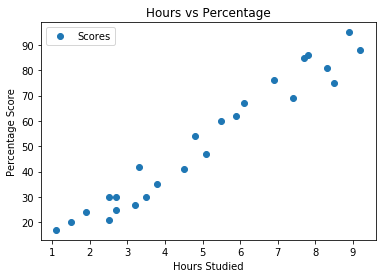

In [19]:
dataset.plot(x = "Hours", y = "Scores", style = "o")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours vs Percentage")
plt.show()

### Step4: Preparing the Data

In [24]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
#print(X.shape)
#print(y.shape)

(25, 1)
(25,)


### Step5: Split Data for training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(X_train.shape)
#print(X_test.shape)

### Step6: Training the Algorithm

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#To retrieve the intercept:
print(lr.intercept_)

2.018160041434662


In [38]:
#For retrieving the slope (coefficient of x):
print(lr.coef_)

[9.91065648]


### Step7: Making Predictions : Model Building

In [43]:
y_predict = lr.predict(X_test)
#The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

In [46]:
#To compare the actual output values for X_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Step 8 : Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 

2. Mean Squared Error (MSE) is the mean of the squared errors.

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.


In [49]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


### Result Statement: You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.